In [1]:
%load_ext autoreload
%autoreload 2

import builtins
from IPython.lib import deepreload
builtins.reload = deepreload.reload


In [19]:
import gamelib

In [16]:
jeu = gamelib.GameClass(7, 0.5)
jeu.lance_gui()

Quel type de joueur souhaitez vous sélectionner pour noir ? Les possibilités sont :
1  : <class 'playerlib.Humain'>
2  : <class 'playerlib.IARandom'>
3  : <class 'playerlib.IAMonteCarlo'>
4  : <class 'playerlib.IAMonteCarloBIS'>
Tapez le nombre correspondant.
4


TypeError: __init__() missing 1 required positional argument: 'max_nb_evals'

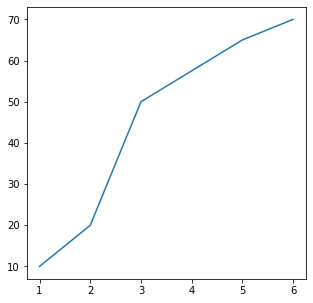

In [8]:
import gamelib
import playerlib
import numpy as np
import copy
import movelib
import matplotlib.pyplot as plt
import time

plt.figure(figsize=(5, 5))
x = [1,2,3,5,6]
y = [10,20,50,65,70]
plt.plot(x,y)
plt.show()

In [22]:
import playerlib
import gamelib

black_wins = 0
white_wins = 0
nb_party = 10



for i in range(nb_party):

    jeu = gamelib.GameClass(5, 0.5, {"choix_joueurs": False})
    jeu.blanc = playerlib.IARandom(jeu, -1)
    jeu.noir = playerlib.IAMonteCarloBIS(jeu, 1, 5)
    jeu.joueur_courant = jeu.noir
    while(not jeu.partie_finie):
        jeu.jouer(jeu.joueur_courant.donne_coup(jeu))

    score =  jeu.score()
    print("partie :", i , "score: ", score)
    if score < 0:
        white_wins += 1
        
        print("white wins")
    else:
        black_wins += 1
        print("Black wins")




print("Black : ", black_wins, "White :", white_wins)
    

partie : 0 score:  26.5
Black wins
partie : 1 score:  30.5
Black wins
partie : 2 score:  34.5
Black wins
partie : 3 score:  30.5
Black wins
partie : 4 score:  32.5
Black wins
partie : 5 score:  37.5
Black wins
partie : 6 score:  34.5
Black wins
partie : 7 score:  32.5
Black wins
partie : 8 score:  30.5
Black wins
partie : 9 score:  30.5
Black wins
Black :  10 White : 0


In [2]:
import playerlib
import gamelib
import numpy as np
import copy
import movelib
import matplotlib.pyplot as plt
import time

black_wins = 0
white_wins = 0
black_wins_total = 0
white_wins_total = 0
nb_party = 25
nb_evals_max =10
score_by_evals = 0
scores_by_num_evals = []
party_wins_by_MC=[]
time_by_evals=[]
time_moyen_by_party=0

for j in range(nb_evals_max):
    for i in range(nb_party):

        jeu = gamelib.GameClass(5, 0.5, {"choix_joueurs": False})
        jeu.blanc = playerlib.IARandom(jeu, -1)
        jeu.noir = playerlib.IAMonteCarloBIS(jeu, 1, j)
        jeu.joueur_courant = jeu.noir
        debut = time.time()
        while(not jeu.partie_finie):
            jeu.jouer(jeu.joueur_courant.donne_coup(jeu))

        score =  jeu.score()
        fin = time.time()
        tps = fin-debut
        print("evals : ", j,"partie :", i , "score: ", score, "temps en seconde :", tps)
        score_by_evals+=score
        time_moyen_by_party+=tps
        if score < 0:
            white_wins += 1

        else:
            black_wins += 1
          
    
    party_wins_by_MC.append(black_wins)
    scores_by_num_evals.append(score_by_evals/nb_party)
    time_by_evals.append(time_moyen_by_party/nb_party)
    black_wins_total+=black_wins
    white_wins_total+=white_wins
    black_wins = 0
    white_wins = 0
    score_by_evals = 0



print("Black : ", black_wins_total, "White :", white_wins_total)
plt.figure(figsize=(5, 5))
tab_nb_evals_max = [i for i in range(nb_evals_max)]
tab_nb_party = [i for i in range(nb_evals_max*nb_party)]



evals :  0 partie : 0 score:  23.5 temps en seconde : 0.0
evals :  0 partie : 1 score:  -23.5 temps en seconde : 0.0
evals :  0 partie : 2 score:  -5.5 temps en seconde : 0.0
evals :  0 partie : 3 score:  35.5 temps en seconde : 0.0
evals :  0 partie : 4 score:  -30.5 temps en seconde : 0.0
evals :  0 partie : 5 score:  6.5 temps en seconde : 0.0
evals :  0 partie : 6 score:  -20.5 temps en seconde : 0.0
evals :  0 partie : 7 score:  2.5 temps en seconde : 0.0
evals :  0 partie : 8 score:  -21.5 temps en seconde : 0.0
evals :  0 partie : 9 score:  -29.5 temps en seconde : 0.0
evals :  0 partie : 10 score:  32.5 temps en seconde : 0.015620708465576172
evals :  0 partie : 11 score:  2.5 temps en seconde : 0.0
evals :  0 partie : 12 score:  -8.5 temps en seconde : 0.0
evals :  0 partie : 13 score:  32.5 temps en seconde : 0.0
evals :  0 partie : 14 score:  -5.5 temps en seconde : 0.0
evals :  1 partie : 0 score:  29.5 temps en seconde : 0.28534913063049316
evals :  1 partie : 1 score:  34

evals :  7 partie : 10 score:  27.5 temps en seconde : 2.0995349884033203
evals :  7 partie : 11 score:  32.5 temps en seconde : 2.2763473987579346
evals :  7 partie : 12 score:  33.5 temps en seconde : 2.397430658340454
evals :  7 partie : 13 score:  31.5 temps en seconde : 2.6374311447143555
evals :  7 partie : 14 score:  32.5 temps en seconde : 2.1352450847625732
evals :  8 partie : 0 score:  33.5 temps en seconde : 2.5405025482177734
evals :  8 partie : 1 score:  35.5 temps en seconde : 2.8272435665130615
evals :  8 partie : 2 score:  30.5 temps en seconde : 2.533674478530884
evals :  8 partie : 3 score:  27.5 temps en seconde : 2.927957057952881
evals :  8 partie : 4 score:  29.5 temps en seconde : 2.4285387992858887
evals :  8 partie : 5 score:  31.5 temps en seconde : 2.719216823577881
evals :  8 partie : 6 score:  36.5 temps en seconde : 2.812767267227173
evals :  8 partie : 7 score:  31.5 temps en seconde : 2.808502674102783
evals :  8 partie : 8 score:  37.5 temps en seconde 

evals :  15 partie : 2 score:  31.5 temps en seconde : 5.2467687129974365
evals :  15 partie : 3 score:  35.5 temps en seconde : 5.1420605182647705
evals :  15 partie : 4 score:  34.5 temps en seconde : 5.011780261993408
evals :  15 partie : 5 score:  28.5 temps en seconde : 5.537107706069946
evals :  15 partie : 6 score:  34.5 temps en seconde : 5.535994529724121
evals :  15 partie : 7 score:  36.5 temps en seconde : 6.04288911819458
evals :  15 partie : 8 score:  30.5 temps en seconde : 4.864898920059204
evals :  15 partie : 9 score:  31.5 temps en seconde : 5.325592041015625
evals :  15 partie : 10 score:  36.5 temps en seconde : 5.018744468688965
evals :  15 partie : 11 score:  33.5 temps en seconde : 5.008744955062866
evals :  15 partie : 12 score:  30.5 temps en seconde : 5.8199872970581055
evals :  15 partie : 13 score:  30.5 temps en seconde : 5.105344772338867
evals :  15 partie : 14 score:  28.5 temps en seconde : 4.949111461639404
evals :  16 partie : 0 score:  34.5 temps en

<Figure size 360x360 with 0 Axes>

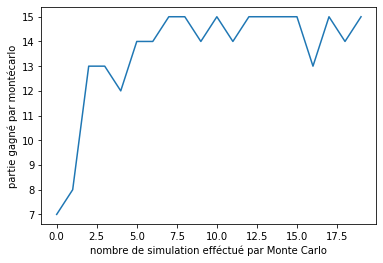

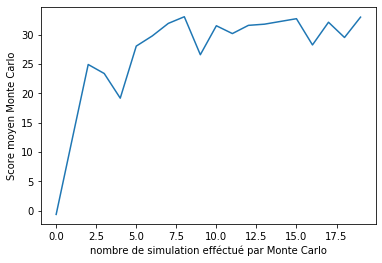

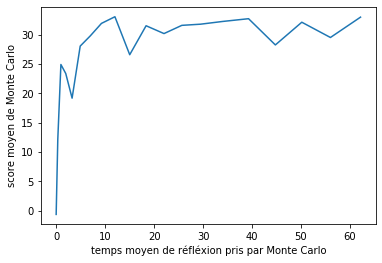

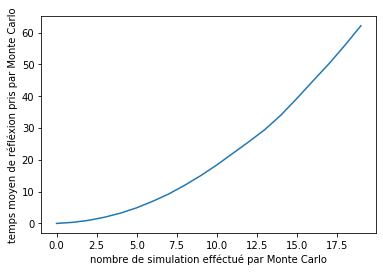

In [7]:
plt.plot(tab_nb_evals_max,party_wins_by_MC)
plt.xlabel("nombre de simulation efféctué par Monte Carlo")
plt.ylabel("partie gagné par montécarlo")
plt.show()

plt.plot(tab_nb_evals_max,scores_by_num_evals)
plt.xlabel("nombre de simulation efféctué par Monte Carlo")
plt.ylabel("Score moyen Monte Carlo")
plt.show()

plt.plot(time_by_evals,scores_by_num_evals)
plt.xlabel("temps moyen de réfléxion pris par Monte Carlo")
plt.ylabel("score moyen de Monte Carlo")
plt.show()

plt.plot(tab_nb_evals_max,time_by_evals)
plt.xlabel("nombre de simulation efféctué par Monte Carlo")
plt.ylabel("temps moyen de réfléxion pris par Monte Carlo")
plt.show()